# 1 Tienda de videojuegos online ICE

## Descripción del proyecto


Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


Ruta de archivo:

/datasets/games.csv

##  Abriendo el archivo y estudiando la información general

### Carga de librerías requeridas para la ejecución del proyecto

In [3]:
#Carga las librerías
from scipy import stats as st
from scipy.stats import levene
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de los datos del dataframe

In [4]:
#Carga el dataframe
df_ice=pd.read_csv('/datasets/games.csv' , sep=',')


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

###  Estudio de la informacicón general del dataframe

In [ ]:
#Ejecución de info
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
#Muestra de datos
print(df_ice.head(10))


                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [ ]:
#Consultado valores ausentes
print(df_ice.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


## Preparación los datos

### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [ ]:
#Cambiando a minúsculas y quitando espacios al inico y fin y eliminando espacios intermedios por guiones bajos si fuera el caso
new_col_names = []
for old_name in df_ice.columns:
	name_stripped = old_name.strip()
	name_lowered = name_stripped.lower()
	name_no_spaces = name_lowered.replace(' ', '_')
	new_col_names.append(name_no_spaces)

df_ice.columns = new_col_names
print(df_ice.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Convierte los valores ausentes

In [ ]:
#Cambiar los valores ausentes a 0 en year_of_release
df_ice['year_of_release'] = df_ice['year_of_release'].fillna(0)
#Cambiar los valores ausentes a 0 en critic_score
df_ice['critic_score'] = df_ice['critic_score'].fillna(0)
#Cambiar los valores ausentes a 0 en user_score
df_ice['user_score'] = df_ice['user_score'].fillna(0)
#Cambiar los valores ausentes a - en rating
df_ice['rating'] = df_ice['rating'].fillna('-')
#Cambiar los valores ausentes a Misc en rating
df_ice['genre'] = df_ice['genre'].fillna('Misc')

### Tratamiento de los valores ausentes

Se realizó el reemplazo de los valores ausentes debido a que es necesario realizar algunos cálculos en los que es mejor tener un 0 a tener letras, así como en el campo rating que agregamos '-' a efecto de indicar que ese campo no cuenta con un valor.

### Convierte los datos en los tipos necesarios

In [ ]:

# Se reemplazó tbd por 0 para dejar un valor homologado a números flotantes para que podamos realizar cálculos con los valores convirtiéndolos a float posteriormente
df_ice['user_score'] = df_ice['user_score'].replace('tbd', 0)
#Cambiando user_score a float
df_ice['user_score'] = df_ice['user_score'].astype(float)

#Cambiar a int year_of_release
df_ice['year_of_release'] = df_ice['year_of_release'].astype(int)
print()
df_ice.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Revisando si existen valores duplicados

In [ ]:
df_ice_duplicated = df_ice.duplicated().sum()
print("Total de duplicados: " ,df_ice_duplicated)

Total de duplicados:  0


### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Con la finalidad de contar con datos limpios y en los formatos correctos para realizar cálculos se realizaron los siguientes cambios:
- year_of_release: Se modificó el tipo de dato a entero debido a que se mostraba flotante, por ejemplo 2008.0 y no es correcto para mostrar gráficamente estos resultados.
- user_score se cambio de object a float para poder hacer cálculos con estos valores, previamente fue necesario cambiar los 'tbd' a 0 para aplicar el cambio a float.


### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Los valores ausentes pueden deberse a que los videojuegos no han sido calificados, no se han vendido tanto como se esperaba, o simplemente no fueron tan buenos y no se ha considerado necesario generar un análisis de los videojuegos menos populares.

### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

Se realizó el reemplazo de los valores 'tbd' a 0 a efecto de cambiar el tipo de dato de la columna user_score y contar con valores que se puedan sumar, o agrupar con facilidad

### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [ ]:
#Calcula las ventas
#Ventas totales de cada juego y agregarlas a una nueva columna
df_ice['total_sales'] = df_ice[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#print("Muestra con el nuevo campo total_sales")
print()
print(df_ice.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           0.0         0.0      -   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           0.0         0.0      -   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  


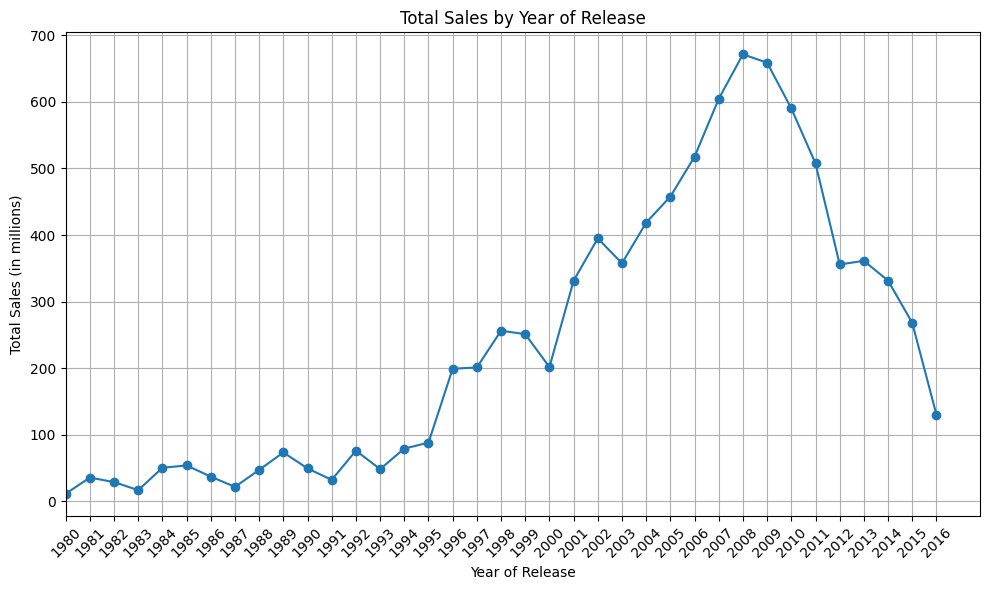

In [ ]:
#Gráfica de líneas ventas por año
#Filtrar año distinto a 0
df_ice = df_ice[df_ice['year_of_release'] != 0]
# Agrupar por año de lanzamiento y sumar las ventas totales
sales_by_year = df_ice.groupby('year_of_release')['total_sales'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['year_of_release'], sales_by_year['total_sales'], marker='o')
plt.title('Total Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(sales_by_year['year_of_release'], rotation=45)

# Ajustar el eje x para que no empiece en 0
plt.xlim(left=sales_by_year['year_of_release'].min())  # Comienza en el año más bajo

plt.grid()
plt.tight_layout()
plt.show()

Analizando la gráfica anterior, podemos observar que en el periodo comprendido de 1980 a 1995, las ventas eran menores a 100 millones, a partir del 1996 se observa un crecimiento de ventas a partir de 200 millones, encontrando en el año 2008 de mayores ventas, con una cifra cercana a los 700 millones. Por último, a partir del 2012 y hasta 2016 se observa una caida importante en las ventas de aproximadamente 350 millones y llegando de nueva cuenta casi a los 100 millones.

##  Analizando los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

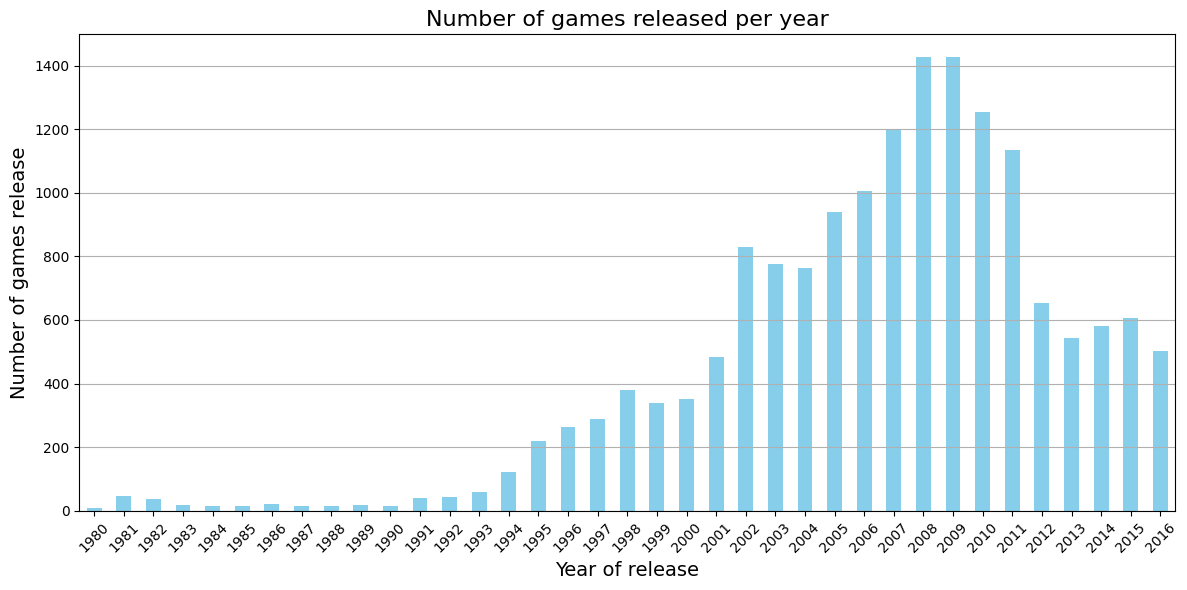

In [ ]:

# Agrupar por año de lanzamiento y contar el número de juegos
df_year_of_release = df_ice.groupby('year_of_release').agg({
    'name': 'count'  # Contar el número de juegos por año
}).rename(columns={'name': 'number_of_games'})
# Mostrar el resultado
plt.figure(figsize=(12, 6))
df_year_of_release['number_of_games'].plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Number of games released per year', fontsize=16)
plt.xlabel('Year of release', fontsize=14)
plt.ylabel('Number of games release', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Revisando la gráfica anterior respectoa los juegos lanzados por año, podemos observar que existen 269 videojuegos que no cuentan con año de lanzamiento. Adicionalmente, podemos observar que en el periodo comprendido de 1980 a 1993 el crecimiento de lanzamientos por año era mínimo con un máximo de 60. Entre 1994 y 2004 se observa un crecimiento de lanzamientos de entre 120 y 800, pero a partirde 2005 a 2011 se lanzaron al mercado la mayor cantidad de videojuegos entre 936 hasta 1,427.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

### Cálculo de ventas totales por plataformas

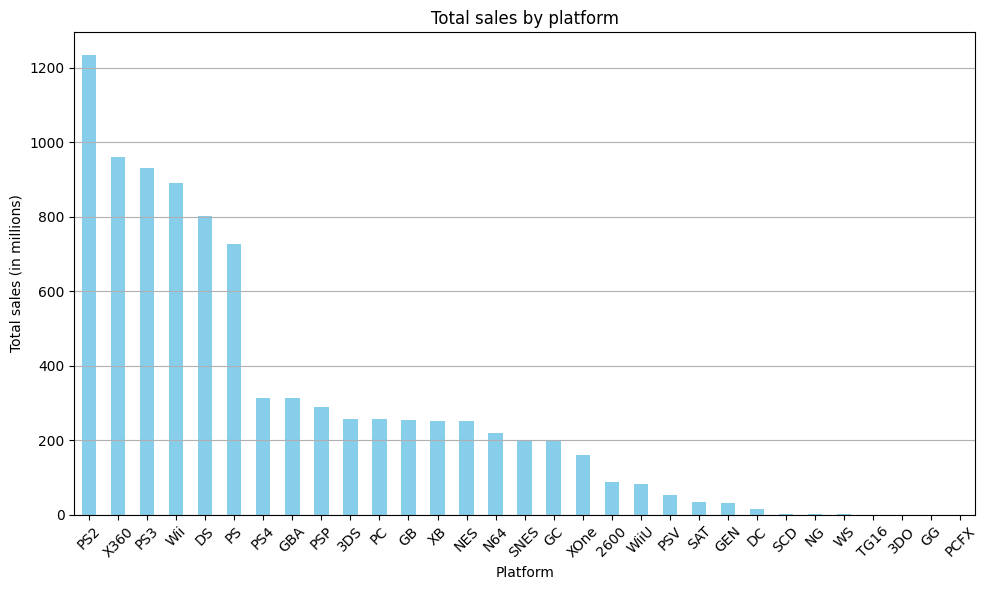

In [ ]:
# 1. Calcular las ventas totales por plataforma
platform_sales = df_ice.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# Crear la gráfica de barras
print()
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='skyblue')
# Añadir títulos y etiquetas
plt.title('Total sales by platform', fontsize=12)
plt.xlabel('Platform', fontsize=10)
plt.ylabel('Total sales (in millions)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y')
# Mostrar la gráfica
plt.tight_layout()
plt.show()

Observando la gráfica de barras anterior, podemos concluir que las 5 plataformas que han generado los mayores ingresos son las siguientes:
1. PS2
2. X360
3. PS3
4. Wii
5. DS

### Plataformas con mayores ventas

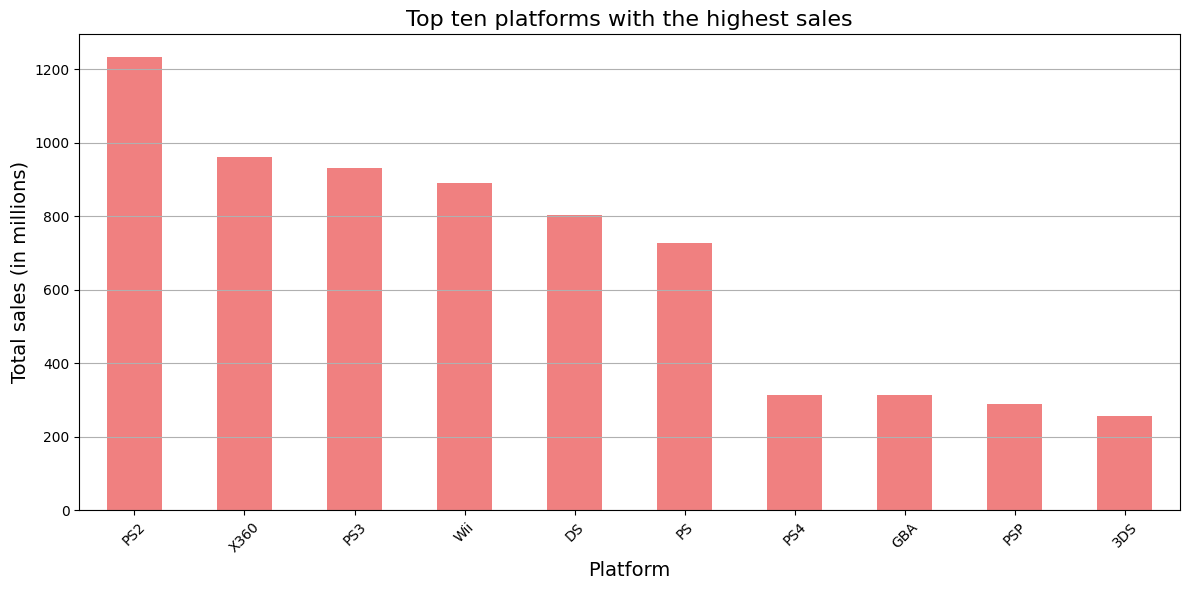

In [ ]:
# 2. Identificar las plataformas con mayores ventas
top_platforms = platform_sales.head(10)
# Crear la gráfica de barras para las 10 plataformas
plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='lightcoral')
# Añadir títulos y etiquetas
plt.title('Top ten platforms with the highest sales', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales (in millions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
# Mostrar la gráfica
plt.tight_layout()
plt.show()

En el top ten de plataformas con mayores ventas, encontramos plataformas fijas y portátiles lo que muestra la relación entre los años con mayores ventas y el mayor número de videojuegos lanzados a partir de la década del año 2000. 

### Distribución de ventas por años

<Figure size 1400x700 with 0 Axes>

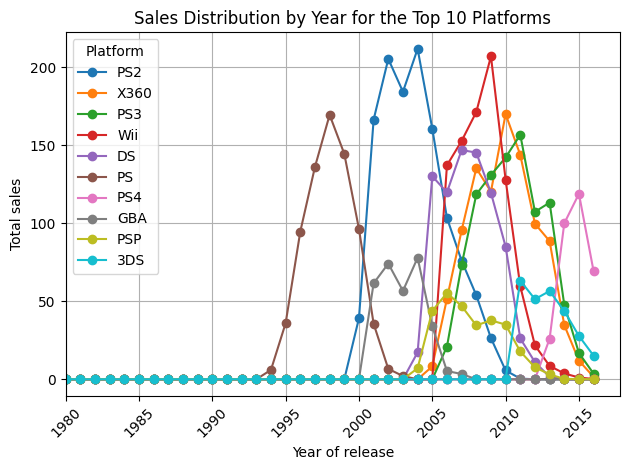

In [ ]:
# 3. Construir una distribución de ventas por año
# Obtener las 10 plataformas con más ventas
top_platforms = platform_sales.head(10).index

# Agrupar por año de lanzamiento y plataforma, y sumar las ventas totales
sales_distribution = df_ice.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

# Filtrar para incluir solo las plataformas del top 10
sales_distribution_top10 = sales_distribution[top_platforms]

# Crear la gráfica de distribución de ventas por años para las 10 plataformas
plt.figure(figsize=(14, 7))
sales_distribution_top10.plot(kind='line', marker='o')

# Añadir títulos y etiquetas
plt.title('Sales Distribution by Year for the Top 10 Platforms', fontsize=12)
plt.xlabel('Year of release', fontsize=10)
plt.ylabel('Total sales', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid()

# Ajustar el eje x para que no empiece en 0
plt.xlim(left=sales_by_year['year_of_release'].min())  # Comienza en el año más bajo

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Analizando la gráfica anterior podemos observar que la mayoría de los juegos tiene un pico de ventas de aproximadamente  5 años, siendo el de mayores ventas el PS2. Sin embargo, el Xbox 360, es el que se ha mantenido por un mayor periodo con ventas entre 50 millones hasta 170 millones, entre los años 2005 al 2014. 

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Las plataformas que solían ser populares pero que ahora no tienen ventas son: 
    - Las plataformas 2600, DC, SNES, GBA, GEN y SAT tuvieron ventas altas en su momento, pero hoy en día no tienen ventas, esto se debe al cambio generacional que generaron los avances tecnológicos, creando consolas con mayores prestaciones y con juegos de mejor calidad gráfica, si bien quedarán como grandes clásicos algunas de esas consolas, el poderío de las nuevas plataformas estaba destinao a dominar el mercado.
    
La plataformas antiguas tardan entre 5 y 13 años en desaparecer y las nuevas tardan aproximadamente entre 4 y 7 años en desaparecer.

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Se observa que podemos obtener datos de los años 2012 a 2016, a efecto de generar una proyección para el año 2017. De acuerdo al comportamiento de los ventas, plataformas y usuarios de esos años más cercanos, toda vez que 

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [ ]:
print("Muestra de las plataformas con mayores ventas")
print(top_platforms)

Muestra de las plataformas con mayores ventas
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')


### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

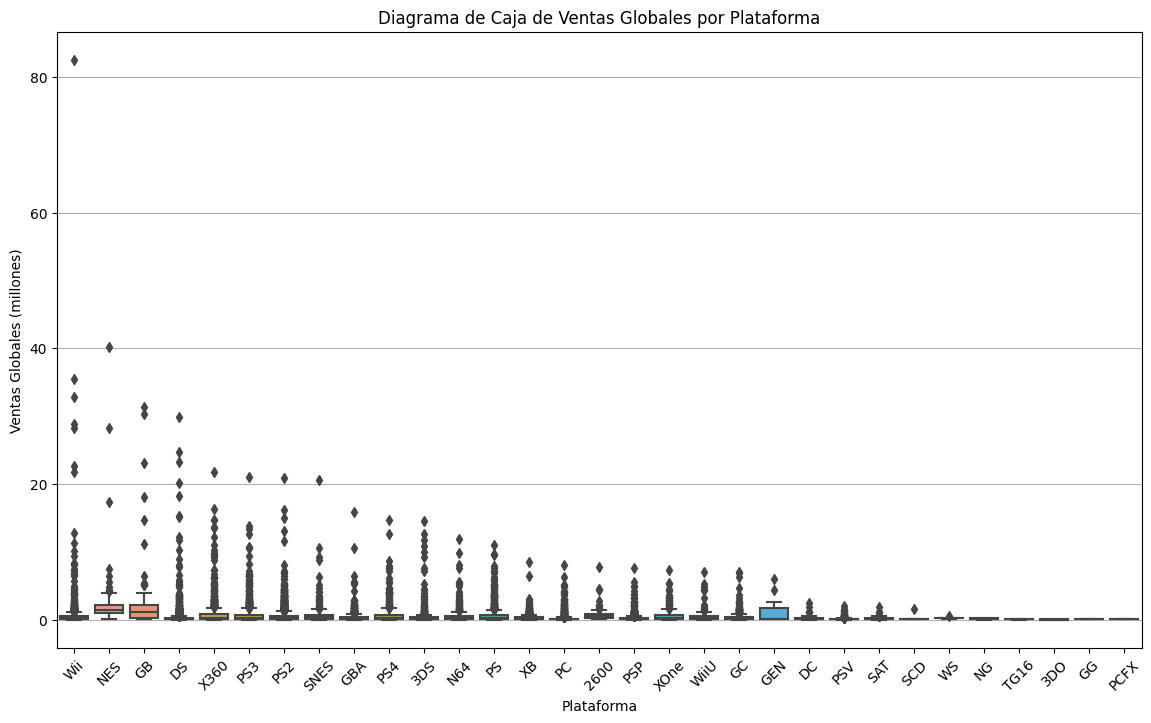

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=df_ice)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

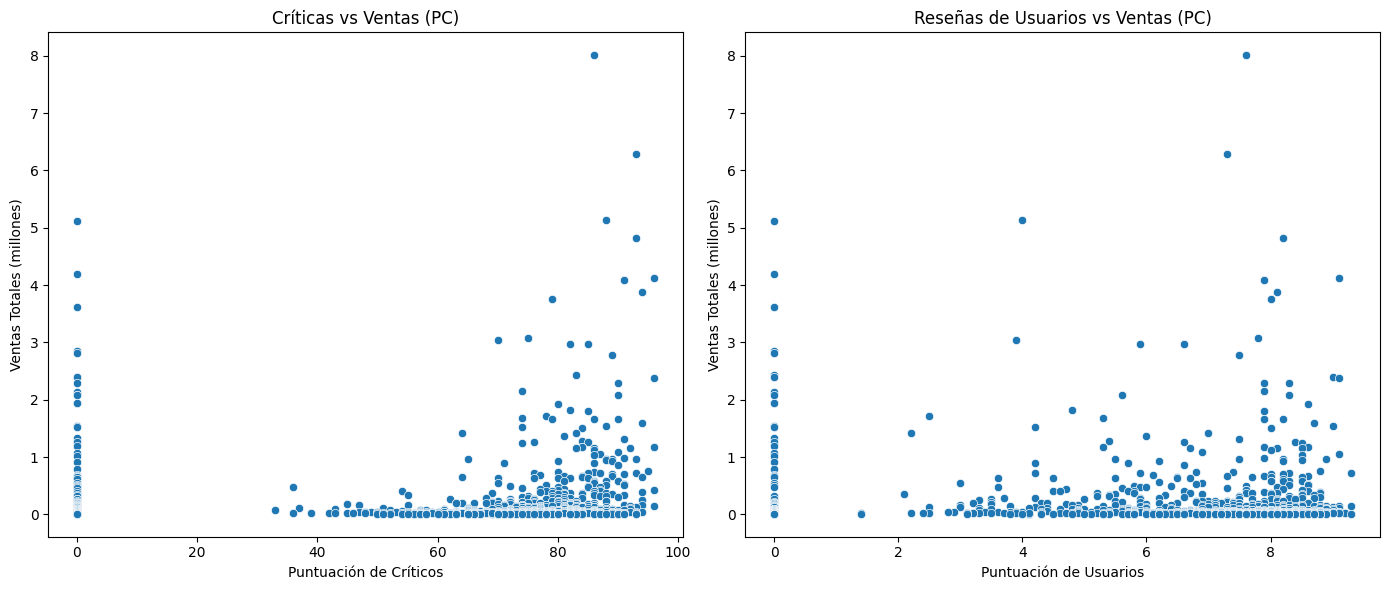

Correlación entre la puntuación de críticos y las ventas: 0.08
Correlación entre la puntuación de usuarios y las ventas: 0.01


In [ ]:
df_pc = df_ice[df_ice['platform'] == 'PC']

# 1. Crear gráficos de dispersión
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para las reseñas de críticos vs. ventas
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=df_pc)
plt.title('Críticas vs Ventas (PC)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')

# Gráfico de dispersión para las reseñas de usuarios vs. ventas
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=df_pc)
plt.title('Reseñas de Usuarios vs Ventas (PC)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

# 2. Calcular la correlación
critic_corr = df_pc['critic_score'].corr(df_pc['total_sales'])
user_corr = df_pc['user_score'].corr(df_pc['total_sales'])

print(f'Correlación entre la puntuación de críticos y las ventas: {critic_corr:.2f}')
print(f'Correlación entre la puntuación de usuarios y las ventas: {user_corr:.2f}')

Podemos concluir que las puntuaciones emitidas por los expertos y los usuarios no tienen un impacto negativo en las ventas, existe un correlación muy baja. Por lo anterior, podemos concluir que los usuarios no toman en cuenta las puntuaciones de expertos y de otros usuarios a la hora de comprar un videojuego.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

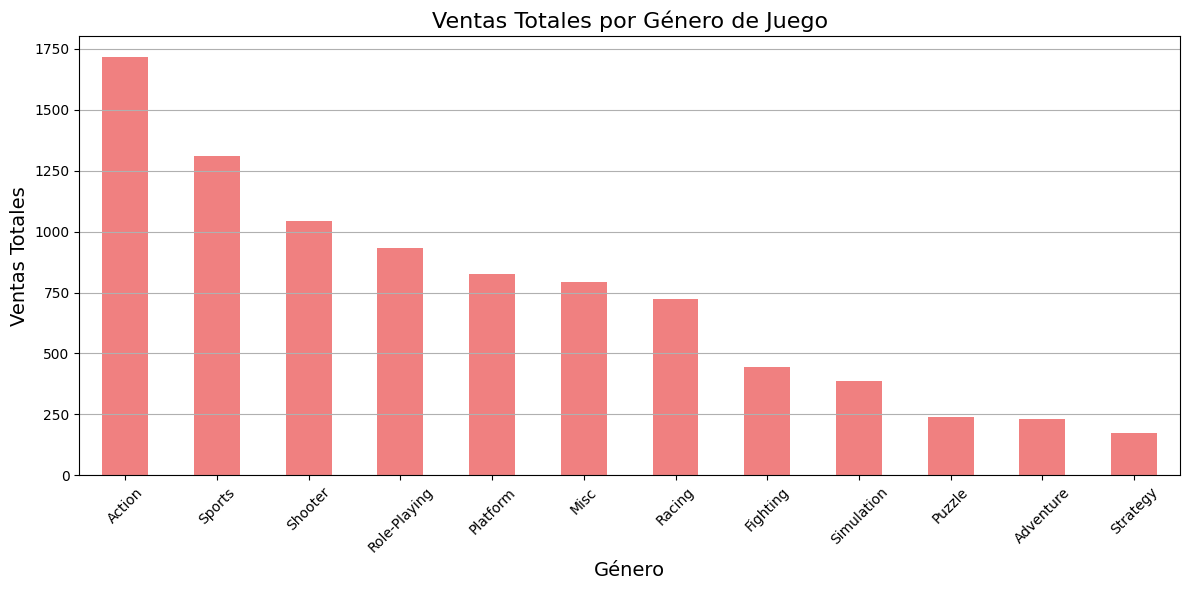

In [ ]:
# Distribución de juegos por género
df_game_genre = df_ice.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print()
# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
df_game_genre.plot(kind='bar', color='lightcoral')

# Añadir títulos y etiquetas
plt.title('Ventas Totales por Género de Juego', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Los géneros más rentables son:
- Action
- Sports
- Shooter <br>
Son rentables toda vez que tiene mayores ventas y se han encontrado vigentes por varios años.
<br> 

## crea un perfil de usuario para cada región</b>

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Plataformas principales por región

In [ ]:
#Obteniendo las 5 plataformas principales
na_sales = df_ice.groupby('platform')['na_sales'].sum().reset_index()
eu_sales = df_ice.groupby('platform')['eu_sales'].sum().reset_index()
jp_sales = df_ice.groupby('platform')['jp_sales'].sum().reset_index()

#Usamos nlargest para traer las 5 principales plataformas
top_na_platforms = na_sales.nlargest(5, 'na_sales')
top_eu_platforms = eu_sales.nlargest(5, 'eu_sales')
top_jp_platforms = jp_sales.nlargest(5, 'jp_sales')

#Imprimimos el resultado de cada región
print("Top 5 plataformas en NA:")
print(top_na_platforms)

print("\nTop 5 plataformas en EU:")
print(top_eu_platforms)

print("\nTop 5 plataformas en JP:")
print(top_jp_platforms)

Top 5 plataformas en NA:
   platform  na_sales
28     X360    595.74
16      PS2    572.92
26      Wii    486.87
17      PS3    390.13
4        DS    380.31

Top 5 plataformas en EU:
   platform  eu_sales
16      PS2    332.63
17      PS3    327.21
28     X360    268.32
26      Wii    258.32
15       PS    212.39

Top 5 plataformas en JP:
   platform  jp_sales
4        DS    175.02
15       PS    139.78
16      PS2    137.54
23     SNES    116.55
2       3DS    100.62


### Describe las variaciones en sus cuotas de mercado de una región a otra.

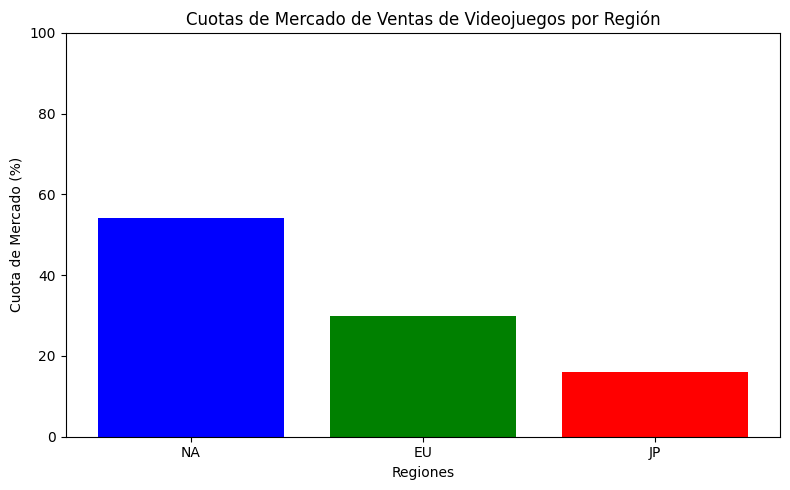

In [ ]:
# Calcular las ventas totales por región
total_na_sales = df_ice['na_sales'].sum()
total_eu_sales = df_ice['eu_sales'].sum()
total_jp_sales = df_ice['jp_sales'].sum()

# Calcular las cuotas de mercado
market_share = {
    'Region': ['NA', 'EU', 'JP'],
    'Sales': [total_na_sales, total_eu_sales, total_jp_sales]
}

market_share_df = pd.DataFrame(market_share)

# Calcular la cuota de mercado como porcentaje
market_share_df['Market Share (%)'] = (market_share_df['Sales'] / market_share_df['Sales'].sum()) * 100

# Crear la gráfica
plt.figure(figsize=(8, 5))

# Crear las barras
plt.bar(market_share_df['Region'], market_share_df['Market Share (%)'], color=['blue', 'green', 'red'])

# Añadir título y etiquetas
plt.title('Cuotas de Mercado de Ventas de Videojuegos por Región')
plt.xlabel('Regiones')
plt.ylabel('Cuota de Mercado (%)')
plt.ylim(0, 100)  # Establecer límites en el eje y

# Mostrar la gráfica
plt.tight_layout()
plt.show()



En el análisis de las cuotas de mercado de videojuegos, se observa que América del Norte (NA) mantiene una participación significativa, mientras que Europa (EU) se sitúa en un 27.3%. Por otro lado, Japón (JP) ha experimentado una disminución en su cuota de mercado en comparación con años anteriores, reflejando un cambio en las preferencias de los consumidores y la competencia global.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
# Agrupar por 'rating' y sumar las ventas por región
sales_rating = df_ice.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

# Mostrar resultados
print(sales_rating)

  rating  na_sales  eu_sales  jp_sales
0      -   1227.62    610.18    836.77
1     AO      1.26      0.61      0.00
2      E   1274.24    703.87    197.96
3   E10+    345.50    183.35     40.20
4     EC      1.53      0.11      0.00
5    K-A      2.56      0.27      1.46
6      M    742.89    480.00     63.58
7     RP      0.00      0.03      0.00
8      T    747.60    421.79    150.70


Las clasificaciones influyen en las ventas por regiones individuales, ya que se observa que al menos en la clasificación AO (Adultos únicamente + 18) no se compran en la región de Japón, así como la clasificación M, que también puede contener escenas delicadas y por temas culturales, es probable que este contenido tenga menores ventas en dicha región.

### Los 5 géneros principales por región

In [ ]:
# Agrupar por género y sumar las ventas
na_sales = df_ice.groupby('genre')['na_sales'].sum().reset_index()
eu_sales = df_ice.groupby('genre')['eu_sales'].sum().reset_index()
jp_sales = df_ice.groupby('genre')['jp_sales'].sum().reset_index()

# Obtener los 5 géneros principales por región
top_na_genres = na_sales.nlargest(5, 'na_sales')
top_eu_genres = eu_sales.nlargest(5, 'eu_sales')
top_jp_genres = jp_sales.nlargest(5, 'jp_sales')

# Imprimir los resultados
print("Top 5 géneros en NA:")
print(top_na_genres)

print("\nTop 5 géneros en EU:")
print(top_eu_genres)

print("\nTop 5 géneros en JP:")
print(top_jp_genres)

Top 5 géneros en NA:
       genre  na_sales
0     Action    863.17
10    Sports    671.20
8    Shooter    584.83
4   Platform    444.44
3       Misc    401.35

Top 5 géneros en EU:
      genre  eu_sales
0    Action    510.99
10   Sports    371.33
8   Shooter    314.52
6    Racing    234.49
3      Misc    211.13

Top 5 géneros en JP:
           genre  jp_sales
7   Role-Playing    353.39
0         Action    160.14
10        Sports    134.93
4       Platform    130.71
3           Misc    107.05


Los géneros de videojuegos pueden variar entre regiones. Por ejemplo, los juegos de rol pueden ser más populares en Japón, mientras que los shooters y de acción pueden tener un mejor aceptación en América del Norte.

Las cifras de ventas en cada región indican no solo la popularidad de ciertos géneros, sino también la efectividad de las estrategias de marketing y distribución de las plataformas.

Las diferencias en las ventas pueden reflejar tendencias culturales y de consumo, donde ciertos géneros o plataformas se alinean mejor con las preferencias locales.

## Prueba de hipótesis



— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

### Probando la hipótesis 1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

In [ ]:
# Filtrar los datos para Xbox One y PC
xbox_one_scores = df_ice[df_ice['platform'] == 'XOne']['user_score']
pc_scores = df_ice[df_ice['platform'] == 'PC']['user_score']

# Calculando las medias
mean_xbox_one_scores = xbox_one_scores.mean()
mean_pc_scores = pc_scores.mean()

# Realizar la prueba t
t_stat, p_value = st.ttest_ind(xbox_one_scores.dropna(), pc_scores.dropna(), equal_var=False)


# Resultados
print(f"Calificación promedio Xbox One: {mean_xbox_one_scores}")
print(f"Calificación promedio PC: {mean_pc_scores}")
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio.")
    
    

Calificación promedio Xbox One: 4.805263157894737
Calificación promedio PC: 5.5745036572622775
Estadístico t: -3.445790627024438, Valor p: 0.0006312657449613953
Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.


### Probando la hipótesis 2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
# Filtrar los datos para Acción y deportes
action_scores = df_ice[df_ice['genre'] == 'Action']['user_score']
sports_scores = df_ice[df_ice['genre'] == 'Sports']['user_score']

# Calculando las medias
mean_action_scores = action_scores.mean()
mean_sports_scores = sports_scores.mean()

# Realizar la prueba t
t_stat, p_value = st.ttest_ind(action_scores.dropna(), sports_scores.dropna(), equal_var=False)


# Resultados
print(f"Calificación promedio Acción: {mean_action_scores}")
print(f"Calificación promedio Deportes: {mean_sports_scores}")
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")

# Interpretación
alpha = 0.05 
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio entre Acción y Deportes.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio entre Acción y Deportes.")
    

Calificación promedio Acción: 3.833202298155427
Calificación promedio Deportes: 3.2586730268863833
Estadístico t: 5.796040314377794, Valor p: 7.207560019739062e-09
Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio entre Acción y Deportes.


## Conclusión general.

Derivado del análisis de los datos de la compañía de videojuegos online Ice, podemos concluir lo siguiente:

La distribución de videojuegos por regiones se debe a los generos en los que se clasifican, es decir, en cada una de las regiones tienen mayores ventas diferentes géneros. 

Los más rentables son los generos:
- Action
- Sports
- Shooter

Se observa que no hay una relación entre las calificaciones otorgadas a los videojuegos respecto a las ventas, ya que podemos ver en las gráficas de dispersión que a pesar de que hay videojuegos con calificaciones muy altas, no tienen ventas tan altas como se esperaría.

Por otro lado, observamos que las plataformas también tienen diferente aceptación de acuerdo a la región.

En el análisis de las cuotas de mercado de videojuegos, se observa que América del Norte (NA) mantiene una participación significativa, mientras que Europa (EU) se sitúa en un 27.3%. Por otro lado, Japón (JP) ha experimentado una disminución en su cuota de mercado en comparación con años anteriores, reflejando un cambio en las preferencias de los consumidores y la competencia global.

